<a href="https://colab.research.google.com/github/Tianea2160/PythonPractice/blob/master/Over_sampling_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import name
from google.colab import files

files.upload()

Saving 공사_투찰업체.csv to 공사_투찰업체.csv


In [5]:
import numpy as np
import pandas as pd

data=pd.read_csv("data.csv")

del data['공고명']

data= data[[ '낙찰자결정방법', '입찰률', '공공조달분류명','낙찰여부']]
data = data.dropna()

data = data.reset_index(drop=True)
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,낙찰자결정방법,입찰률,공공조달분류명,낙찰여부
0,수의(견적제출),88.141,기타시설공사,Y
1,수의(견적제출),86.390,기타시설공사,N
2,수의(견적제출),86.475,기타시설공사,N
3,수의(견적제출),86.637,기타시설공사,N
4,수의(견적제출),86.954,기타시설공사,N
...,...,...,...,...
122957,제한최저,87.306,소방시설공사,N
122958,제한최저,87.403,소방시설공사,N
122959,제한최저,87.435,소방시설공사,N
122960,제한최저,87.501,소방시설공사,N


In [6]:
x_data = data.drop('낙찰여부', axis=1)
x_data.shape

(122962, 3)

In [7]:
y_data = data['낙찰여부']
y_data

0         Y
1         N
2         N
3         N
4         N
         ..
122957    N
122958    N
122959    N
122960    N
122961    N
Name: 낙찰여부, Length: 122962, dtype: object

In [8]:
pip install imbalanced-learn --user

In [9]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from collections import Counter

In [12]:
ros= RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(x_data, y_data)
print(Counter(y_data))
print(Counter(y_res))
print(type(X_res))
print(type(y_res))
print(X_res)
print(y_res)

Counter({'N': 122512, 'Y': 450})
Counter({'Y': 122512, 'N': 122512})
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
         낙찰자결정방법     입찰률   공공조달분류명
0       수의(견적제출)  88.141    기타시설공사
1       수의(견적제출)  86.390    기타시설공사
2       수의(견적제출)  86.475    기타시설공사
3       수의(견적제출)  86.637    기타시설공사
4       수의(견적제출)  86.954    기타시설공사
...          ...     ...       ...
245019  수의(견적제출)  87.754      전기공사
245020  수의(견적제출)  87.762  철근콘크리트공사
245021  수의(견적제출)  87.753  상하수도설비공사
245022  수의(견적제출)  87.746       석공사
245023  수의(견적제출)  87.745    실내건축공사

[245024 rows x 3 columns]
0         Y
1         N
2         N
3         N
4         N
         ..
245019    Y
245020    Y
245021    Y
245022    Y
245023    Y
Name: 낙찰여부, Length: 245024, dtype: object


In [ ]:
data

,낙찰자결정방법,입찰률,공공조달분류명,낙찰여부
0,수의(견적제출),88.141,기타시설공사,Y
1,수의(견적제출),86.390,기타시설공사,N
2,수의(견적제출),86.475,기타시설공사,N
3,수의(견적제출),86.637,기타시설공사,N
4,수의(견적제출),86.954,기타시설공사,N
...,...,...,...,...
122957,제한최저,87.306,소방시설공사,N
122958,제한최저,87.403,소방시설공사,N
122959,제한최저,87.435,소방시설공사,N
122960,제한최저,87.501,소방시설공사,N


In [10]:
data['낙찰자결정방법'].value_counts()

수의(견적제출)                                             82214
제한최저                                                 40394
[시행 2020.06.15] 적격심사-추정가격 30억원미만 10억원이상(주계약자관리방식)      297
수의                                                      43
최저제                                                     14
Name: 낙찰자결정방법, dtype: int64

In [15]:
df=[]
for i in range(len(data)):
    df.append({'낙찰자결정방법': data['낙찰자결정방법'][i], '입찰률': data['입찰률'][i], '공공조달분류명': data['공공조달분류명'][i], '낙찰여부': data['낙찰여부'][i]})
df

[{'공공조달분류명': '기타시설공사', '낙찰여부': 'Y', '낙찰자결정방법': '수의(견적제출)', '입찰률': 88.141},
 {'공공조달분류명': '기타시설공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 86.39},
 {'공공조달분류명': '기타시설공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 86.475},
 {'공공조달분류명': '기타시설공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 86.637},
 {'공공조달분류명': '기타시설공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 86.954},
 {'공공조달분류명': '기타시설공사',
  '낙찰여부': 'N',
  '낙찰자결정방법': '수의(견적제출)',
  '입찰률': 87.12799999999999},
 {'공공조달분류명': '기타시설공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 87.381},
 {'공공조달분류명': '기타시설공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 87.565},
 {'공공조달분류명': '정보통신공사', '낙찰여부': 'Y', '낙찰자결정방법': '수의(견적제출)', '입찰률': 87.758},
 {'공공조달분류명': '정보통신공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 87.781},
 {'공공조달분류명': '정보통신공사',
  '낙찰여부': 'N',
  '낙찰자결정방법': '수의(견적제출)',
  '입찰률': 87.79799999999999},
 {'공공조달분류명': '정보통신공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 87.807},
 {'공공조달분류명': '정보통신공사', '낙찰여부': 'N', '낙찰자결정방법': '수의(견적제출)', '입찰률': 8

In [16]:
from sklearn.feature_extraction import DictVectorizer
vec= DictVectorizer(sparse=False, dtype=float)
vec.fit_transform(df)


array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 88.141],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 86.39 ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 86.475],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  1.   ,  0.   , 87.435],
       [ 0.   ,  0.   ,  0.   , ...,  1.   ,  0.   , 87.501],
       [ 0.   ,  0.   ,  0.   , ...,  1.   ,  0.   , 87.669]])

In [ ]:
vec.get_feature_names()

C:\Users\tjdrb\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['공공조달분류명=가스시설시공',
 '공공조달분류명=건축공사',
 '공공조달분류명=금속구조물·창호공사',
 '공공조달분류명=기계설비공사',
 '공공조달분류명=기타시설공사',
 '공공조달분류명=난방시공',
 '공공조달분류명=도장공사',
 '공공조달분류명=문화재수리공사',
 '공공조달분류명=비계·구조물해체공사',
 '공공조달분류명=상하수도설비공사',
 '공공조달분류명=석공사',
 '공공조달분류명=석면해체제거공사',
 '공공조달분류명=소방시설공사',
 '공공조달분류명=습식방수공사',
 '공공조달분류명=승강기설치공사',
 '공공조달분류명=시설물유지관리공사',
 '공공조달분류명=실내건축공사',
 '공공조달분류명=전기공사',
 '공공조달분류명=정보통신공사',
 '공공조달분류명=조경공사',
 '공공조달분류명=조경시설물설치공사',
 '공공조달분류명=조경식재공사',
 '공공조달분류명=철근콘크리트공사',
 '공공조달분류명=토공사',
 '공공조달분류명=토목공사',
 '공공조달분류명=포장공사',
 '낙찰여부=N',
 '낙찰여부=Y',
 '낙찰자결정방법=[시행 2020.06.15] 적격심사-추정가격 30억원미만 10억원이상(주계약자관리방식)',
 '낙찰자결정방법=수의',
 '낙찰자결정방법=수의(견적제출)',
 '낙찰자결정방법=제한최저',
 '낙찰자결정방법=최저제',
 '입찰률']

In [17]:
df1=pd.DataFrame(vec.fit_transform(df))
df1.columns=vec.get_feature_names()
x_data=df1.drop(['낙찰여부=N','낙찰여부=Y'],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_data

,공공조달분류명=가스시설시공,공공조달분류명=건축공사,공공조달분류명=금속구조물·창호공사,공공조달분류명=기계설비공사,공공조달분류명=기타시설공사,공공조달분류명=난방시공,공공조달분류명=도장공사,공공조달분류명=문화재수리공사,공공조달분류명=비계·구조물해체공사,공공조달분류명=상하수도설비공사,...,공공조달분류명=철근콘크리트공사,공공조달분류명=토공사,공공조달분류명=토목공사,공공조달분류명=포장공사,낙찰자결정방법=[시행 2020.06.15] 적격심사-추정가격 30억원미만 10억원이상(주계약자관리방식),낙찰자결정방법=수의,낙찰자결정방법=수의(견적제출),낙찰자결정방법=제한최저,낙찰자결정방법=최저제,입찰률
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,88.141
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,86.390
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,86.475
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,86.637
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,86.954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,87.306
122958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,87.403
122959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,87.435
122960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,87.501


In [18]:
y_data

0         Y
1         N
2         N
3         N
4         N
         ..
122957    N
122958    N
122959    N
122960    N
122961    N
Name: 낙찰여부, Length: 122962, dtype: object

In [19]:
smote = SMOTE(random_state = 42, k_neighbors= 5)
X_smote, y_smote = smote.fit_resample(x_data, y_data)

print(Counter(y_data))
print(Counter(y_smote))

Counter({'N': 122512, 'Y': 450})
Counter({'Y': 122512, 'N': 122512})


In [20]:
bsmote = BorderlineSMOTE(random_state=42, k_neighbors=5, m_neighbors =10)
X_bsmote, y_bsmote = bsmote.fit_resample(x_data, y_data)

print(Counter(y_data))
print(Counter(y_bsmote))

Counter({'N': 122512, 'Y': 450})
Counter({'Y': 122512, 'N': 122512})


In [21]:
ads = ADASYN(random_state = 42, n_neighbors =5)
X_ads, y_das = ads.fit_resample(x_data, y_data)

print(Counter(y_data))
print(Counter(y_das))

Counter({'N': 122512, 'Y': 450})
Counter({'Y': 122609, 'N': 122512})


In [27]:
print(type(y_das))
print(y_das)

print(X_ads)


<class 'pandas.core.series.Series'>
0         Y
1         N
2         N
3         N
4         N
         ..
245116    Y
245117    Y
245118    Y
245119    Y
245120    Y
Name: 낙찰여부, Length: 245121, dtype: object
        공공조달분류명=가스시설시공  공공조달분류명=건축공사  ...  낙찰자결정방법=최저제        입찰률
0                  0.0           0.0  ...          0.0  88.141000
1                  0.0           0.0  ...          0.0  86.390000
2                  0.0           0.0  ...          0.0  86.475000
3                  0.0           0.0  ...          0.0  86.637000
4                  0.0           0.0  ...          0.0  86.954000
...                ...           ...  ...          ...        ...
245116             0.0           0.0  ...          0.0  87.760371
245117             0.0           0.0  ...          0.0  87.820187
245118             0.0           0.0  ...          0.0  87.761056
245119             0.0           0.0  ...          0.0  87.852061
245120             0.0           0.0  ...          0.0  87.83149

In [34]:
from sklearn.datasets import load_iris


iris = load_iris()
print(type(iris.target))
print(type(iris.data))


X_ads.to_numpy()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 88.141     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 86.39      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 86.475     ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 87.76105574],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 87.85206111],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 87.83149344]])

In [35]:
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 기존의 df를 ndarray로 바꿔야지 학습을 시키는 데 사용가능 따라서 to_numpy를 이용함
x_train, x_test, y_train, y_test = train_test_split(X_ads.to_numpy(), y_das.to_numpy(),random_state=156,test_size = 0.2)

# 내가 맡은 부분은 randomforest 이고 처음 학습을 할때에는 필요없어 보이는 부분까지 모두 넣어서 학습을 진행함
rf_clf = RandomForestClassifier()

rf_clf.fit(x_train, y_train)
random_forest_pred = rf_clf.predict(x_test)

print(accuracy_score(random_forest_pred, y_test))


0.9596940336562978


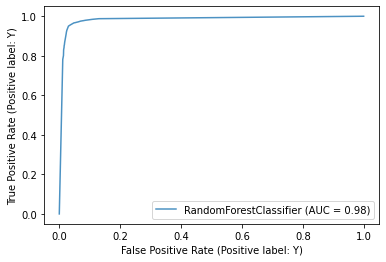

In [37]:
# roc_cur_score

from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# 정확도 검증을 위해서 roc_cur 을 계산하여 시각화 함, 이대 그래프의 아래 면적이 1에 가까울 수록 좋은 곡선이라고 함.
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test, ax=ax, alpha=0.8)
plt.show()
